<a href="https://colab.research.google.com/github/mmsiqueira98/Aprendizado-de-M-quina/blob/main/AprendizadodeM%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aprendizado de Máquina

##Pacotes bibliotecas e links

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Regressão

## 1. Atributos Categóricos

Atributos Categóricos apresentam valores numéricos discretos para representar categorias.

In [ ]:
data = pd.read_csv('/content/Student Performance new.csv')

FileNotFoundError: ignored

In [ ]:
data

### Atributo Categórico Nominal

In [ ]:
data[['race/ethnicity','lunch','sex']].head()

####One hot Coding

Esse método tem como objetivo transformar os valores de uma dada coluna em valor numérico, conforme visto abaixo.

In [ ]:
data['sex_m'] = data['sex'].apply(lambda sex: 1 if sex =='M' else 0)
data['sex_f'] = data['sex'].apply(lambda sex: 1 if sex =='F' else 0)

In [ ]:
data

###Atributo Categórico Ordinal

Nesse caso será realizado o atributo categórigo ordinal, visto que nas linhas de parental_education, por exemplo, os valores categóricos são classificados de acordo com sua ordem.

In [ ]:
data[['parental level of education','test preparation course']]

In [ ]:
data['parental level of education'].drop_duplicates()

In [ ]:
parental_education_mapper = {
    "master's degree": 6,
    "bachelor's degree": 5,
    "associate's degree": 4,
    "some college": 3,
    "high school": 2,
    "some high school": 1,
}

In [ ]:
data['parental level of education encoder'] = data['parental level of education'].map( parental_education_mapper)

In [ ]:
data

### Utilizando Atributos Numéricos

### Escala

In [ ]:
data[['math percentage', 'reading score percentage', 'writing score percentage']]

Normalização

In [ ]:
min = data['math percentage'].min()
max = data['math percentage'].max()
data['math norm'] = data['math percentage'].apply(lambda big: (big-min)/(max-min))

In [ ]:
data.head()

In [ ]:
min = data['math norm'].min()
max = data['math norm'].max()
print(min, max)

Na padronização, para que não percamos o outliers e para que ele não influencie no valor final, nos  devemos aplicar a seguinte fórmula **x1 = x - xm / desvio padrao**

In [ ]:
mean = data['math percentage'].mean()
desvio = data['math percentage'].std()

data['math padr'] = data['math percentage'].apply(lambda x: (x-mean) / desvio)
data.shape

### Dados Faltantes

A tratativa dos dados faltantes deve ser feita de acordo com os valores disponíveis. 
Atributos Numéricos

##Regressão

Dado a altura de um jogador, qual deve ser o seu peso?

### Regressão Linear

In [ ]:
model = LinearRegression()

In [ ]:
nba = pd.read_csv('/content/nba2k-full.csv')

In [ ]:
nba.shape

In [ ]:
nba

In [ ]:
data = nba.drop(['rating','draft_year'], axis=1)

In [ ]:
data = nba[['weight','height']]
data

In [ ]:
data['height'] = data['height'].apply(lambda height: float(height.split(sep='/')[-1].strip()))
data.shape

In [ ]:
data[['height']].describe().T

In [ ]:
data['weight'] = data['weight'].apply(lambda weight: float(weight.split(sep='/')[-1].split(sep='kg')[0].strip()))

In [ ]:
data
data.shape

## Treino / Teste

In [ ]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['weight'], axis=1),
    data['weight'],
    test_size = 0.25,
    random_state = 123
)

Variáveis Predictors

In [ ]:
predictors_train.head()

In [ ]:
predictors_train.shape

In [ ]:
predictors_test.head()

In [ ]:
predictors_train.shape

Variavel Target

In [ ]:
target_train.head()

In [ ]:
target_train.shape

In [ ]:
target_test.head()

In [ ]:
target_test.shape

###Treino

In [ ]:
model = model.fit(predictors_train, target_train)

In [ ]:
model.__dict__

In [ ]:
a = model.coef_
a

In [ ]:
b = model.intercept_
b

In [ ]:
data.head(1)

In [ ]:
altura = 2.06
peso = (a * altura) + b
peso

In [ ]:
altura = np.array([2.06])

In [ ]:
peso = model.predict(altura.reshape(-1, 1))
print(peso)

##Avaliação

In [ ]:
target_predicted = model.predict(predictors_test)
target_predicted[0:5]

In [ ]:
target_predicted.shape

In [ ]:
target_test[0:5]

In [ ]:
target_test.shape

###RMSE

In [ ]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

In [ ]:
test_data = pd.concat([predictors_test, pd.DataFrame(target_test, columns=['weight'])], axis = 1).reset_index(drop=True)

In [ ]:
test_data['predicted'] = False
test_data.head()

In [ ]:
prediction_data = pd.concat([predictors_test.reset_index(drop=True), pd.DataFrame(target_predicted, columns=['weight'])],axis=1).reset_index(drop=True)
prediction_data['predicted'] = True

In [ ]:
prediction_data.tail()

In [ ]:
prediction = pd.concat([test_data, prediction_data]).reset_index(drop=True)
prediction.shape

In [ ]:
with sns.axes_style('whitegrid'): 
  sns.scatterplot(data=prediction, x = 'height', y = 'weight', hue='predicted')

### Comparação

In [ ]:
data = nba[['weight','height','position']]
data.head()

In [ ]:
data['position'].drop_duplicates()

In [ ]:
data['position_f'] = data['position'].apply(lambda sex: 1 if sex =='F' else 0)
data['position_fg'] = data['position'].apply(lambda sex: 1 if sex =='F-G' else 0)
data['position_g'] = data['position'].apply(lambda sex: 1 if sex =='G' else 0)
data['position_fc'] = data['position'].apply(lambda sex: 1 if sex =='F-C' else 0)
data['position_c'] = data['position'].apply(lambda sex: 1 if sex =='C' else 0)
data['position_gf'] = data['position'].apply(lambda sex: 1 if sex =='G-F' else 0)
data['position_cf'] = data['position'].apply(lambda sex: 1 if sex =='C-F' else 0)


In [ ]:
data[['position', 'position_f', 'position_fg', 'position_g', 'position_fc', 'position_c', 'position_gf', 'position_cf']]

In [ ]:
data = data.drop(['position'], axis = 1)

In [ ]:
data['height'] = data['height'].apply(lambda x: float(x.split(sep='/')[-1].strip()))

media = data['height'].mean()
desvio = data['height'].std()

data['height'] = data['height'].apply(lambda x: (x-media)/ desvio)

In [ ]:
data.head(5)

In [ ]:
data['weight'] = data['weight'].apply(lambda x: float(x.split(sep='/')[-1].split(sep='kg')[0].strip()))

In [ ]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['weight'], axis = 1), 
    data['weight'], 
    test_size = 0.25,
    random_state=123
    
)

In [ ]:
model_v2 = model.fit(predictors_train, target_train)
model_v2.__dict__

In [ ]:
a = model_v2.coef_
b = model_v2.intercept_

In [ ]:
target_predicted = model_v2.predict(predictors_test)
rmse_v2 = np.sqrt(mean_squared_error(target_test,target_predicted))

In [ ]:
rmse_v2

In [ ]:
print(f'melhoria de {round(100*(1-(rmse_v2/rmse)))}%')

In [ ]:
test_data = pd.concat([predictors_test, pd.DataFrame(target_test, columns=['weight'])], axis = 1).reset_index(drop=True)
test_data['predicted'] = False
prediction_data = pd.concat([predictors_test.reset_index(drop=True), pd.DataFrame(target_predicted, columns=['weight'])],axis=1).reset_index(drop=True)
prediction_data['predicted'] = True
prediction_v2 = pd.concat([test_data, prediction_data]).reset_index(drop=True)

In [ ]:
with sns.axes_style('whitegrid'): 
  sns.scatterplot(data=prediction, x = 'height', y ='weight', hue='predicted')

In [ ]:
with sns.axes_style('whitegrid'): 
  sns.scatterplot(data=prediction_v2, x = 'height', y ='weight', hue='predicted')

## Predição

In [ ]:
media = float(data['height'].mean())
desvio = float(data['height'].std())
print(media)
print(desvio)



In [ ]:
altura = 2.05
altura_padronizada = (altura - 1.37) / 1
print(altura_padronizada)


In [ ]:
data.head(1)

In [ ]:
jogador = np.array([altura_padronizada, 1, 0, 0, 0, 0, 0, 0])
print(jogador)

In [ ]:
peso = model_v2.predict(jogador.reshape(1, -1))
peso

#Classificação

###Pré Processamento

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris[['species']].drop_duplicates()

,species
0,setosa
50,versicolor
100,virginica


In [ ]:
iris.query("species == 'versicolor'").describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,5.936,0.516171,4.9,5.600,5.90,6.3,7.0
sepal_width,50.0,2.770,0.313798,2.0,2.525,2.80,3.0,3.4
petal_length,50.0,4.260,0.469911,3.0,4.000,4.35,4.6,5.1
petal_width,50.0,1.326,0.197753,1.0,1.200,1.30,1.5,1.8


In [ ]:
iris.query("species =='setosa'").describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,5.006,0.352490,4.3,4.8,5.0,5.200,5.8
sepal_width,50.0,3.428,0.379064,2.3,3.2,3.4,3.675,4.4
petal_length,50.0,1.462,0.173664,1.0,1.4,1.5,1.575,1.9
petal_width,50.0,0.246,0.105386,0.1,0.2,0.2,0.300,0.6


In [ ]:
iris.query("species == 'virginica'").describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,6.588,0.635880,4.9,6.225,6.50,6.900,7.9
sepal_width,50.0,2.974,0.322497,2.2,2.800,3.00,3.175,3.8
petal_length,50.0,5.552,0.551895,4.5,5.100,5.55,5.875,6.9
petal_width,50.0,2.026,0.274650,1.4,1.800,2.00,2.300,2.5


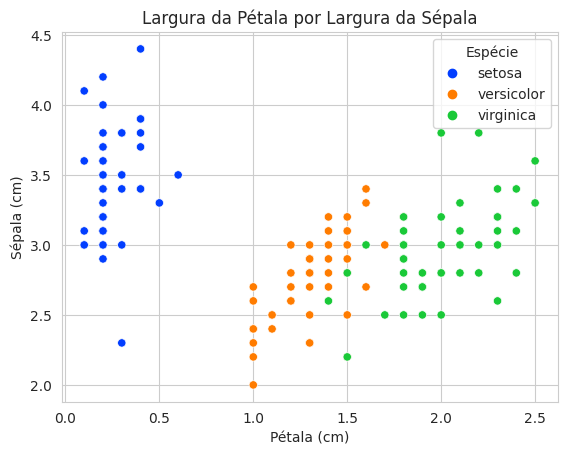

In [ ]:
with sns.axes_style('whitegrid'): 
  grafico = sns.scatterplot(data = iris, x = 'petal_width', y = 'sepal_width', hue = 'species', palette='bright')
  grafico.set(title= 'Largura da Pétala por Largura da Sépala', xlabel= 'Pétala (cm)', ylabel = 'Sépala (cm)');
  grafico.get_legend().set_title('Espécie');

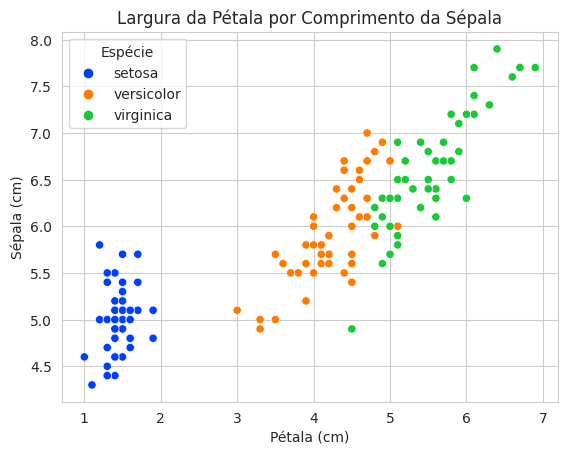

In [ ]:
with sns.axes_style('whitegrid'): 
  grafico = sns.scatterplot(data = iris, x = 'petal_length', y = 'sepal_length', hue = 'species', palette='bright')
  grafico.set(title= 'Largura da Pétala por Comprimento da Sépala', xlabel= 'Pétala (cm)', ylabel = 'Sépala (cm)');
  grafico.get_legend().set_title('Espécie');

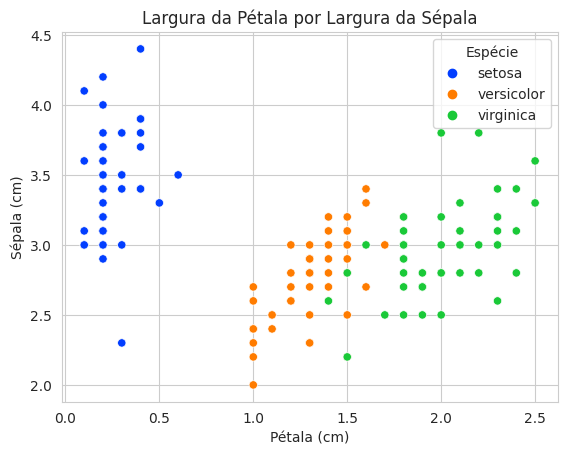

In [ ]:
with sns.axes_style('whitegrid'): 
  grafico = sns.scatterplot(data = iris, x = 'petal_width', y = 'sepal_width', hue = 'species', palette='bright')
  grafico.set(title= 'Largura da Pétala por Largura da Sépala', xlabel= 'Pétala (cm)', ylabel = 'Sépala (cm)');
  grafico.get_legend().set_title('Espécie');

###Treino/Teste


In [ ]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [ ]:
data = iris[['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [ ]:
data.head(1)

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2


In [ ]:
data.query("species == 'setosa'")

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
5,setosa,5.4,3.9,1.7,0.4
6,setosa,4.6,3.4,1.4,0.3
7,setosa,5.0,3.4,1.5,0.2
8,setosa,4.4,2.9,1.4,0.2
9,setosa,4.9,3.1,1.5,0.1


In [ ]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['species'], axis = 1),
    data['species'], 
    test_size = 0.25, 
    random_state = 123
)

In [ ]:
predictors_train.head()

,sepal_length,sepal_width,petal_length,petal_width
16,5.4,3.9,1.3,0.4
82,5.8,2.7,3.9,1.2
60,5.0,2.0,3.5,1.0
35,5.0,3.2,1.2,0.2
143,6.8,3.2,5.9,2.3


In [ ]:
predictors_train.shape

(112, 4)

In [ ]:
predictors_test.shape

(38, 4)

In [ ]:
target_train.shape

(112,)

In [ ]:
target_test.shape

(38,)

In [ ]:
data.shape

(150, 5)

In [ ]:

model = DecisionTreeClassifier()
model = model.fit(predictors_train, target_train)

In [ ]:
target_predicted = model.predict(predictors_test)
target_predicted

array(['versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'setosa'], dtype=object)

In [ ]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
       dtype=object),
 'n_features_in_': 4,
 'n_outputs_': 1,
 'classes_': array(['setosa', 'versicolor', 'virginica'], dtype=object),
 'n_classes_': 3,
 'max_features_': 4,
 'tree_': <sklearn.tree._tree.Tree at 0x7f3adc5a3440>}

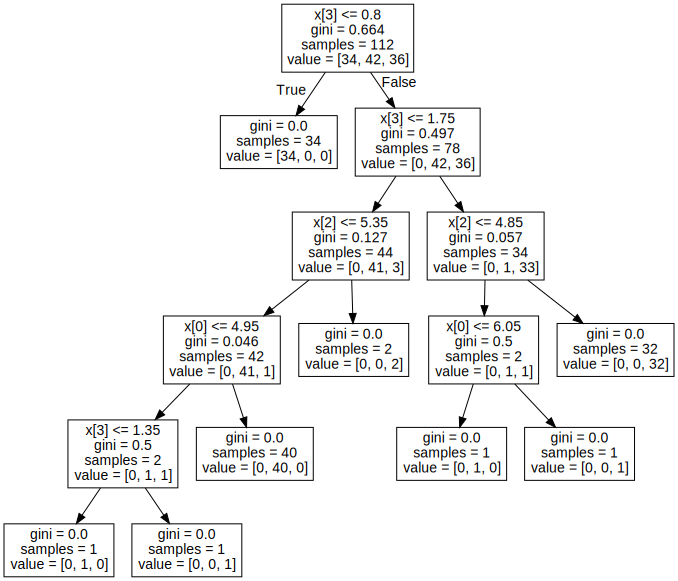

In [ ]:

tree_data = tree.export_graphviz(model, out_file = None)
graph = graphviz.Source(tree_data)
graph

In [ ]:
data.head()


,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [ ]:
features = np.array([5.1, 3.5, 1.4, 0.2])
prediction = model.predict(features.reshape(1, -1))
print(prediction)

['setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
target_predicted = model.predict(predictors_test)
target_predicted[0:5]

array(['versicolor', 'virginica', 'virginica', 'versicolor', 'setosa'],
      dtype=object)

In [ ]:
target_predicted.shape

(38,)

Teste

In [ ]:
target_test[0:5]

72     versicolor
112     virginica
132     virginica
88     versicolor
37         setosa
Name: species, dtype: object

###Matriz de confusão

Essa matriz tem como objetivo identificar o que foi acertado e o que não foi, então podemos observar, por exemplo, que a setosa foi assertiva, enquanto que versicolor teve 3 erros onde, a virginica foi visto como versicolor, e virginica não obteve erros.Essa matriz é muito boa para vermos por categoria os erros e acertos. Para realizarmos a soma deveremos realizar a diferença entre os valores acertados (16,8,11) por (16,8,11,3) para vermos a precisão disso.

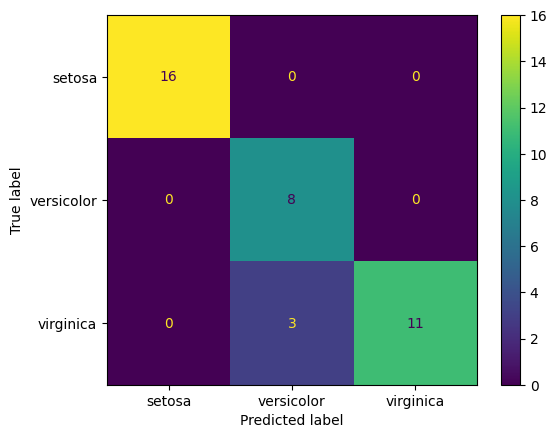

In [ ]:
CM = confusion_matrix(target_test, target_predicted, labels = model.classes_)
CMd = ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = model.classes_)
CMd.plot()

Vejamos isso de forma matemática. 

###Acurácia

In [ ]:
total = CM.sum()
total

38

In [ ]:
acertos = np.diag(CM).sum()
acertos

35

In [ ]:
acuracia =100 * (acertos / total)
print(f'{acuracia:.2f}%')


92.11%


###Predição

In [ ]:
flor = np.array([6.39, 2.71, 6.03, 2.23])
especie = model.predict(flor.reshape(1, -1))
especie

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['virginica'], dtype=object)

In [ ]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

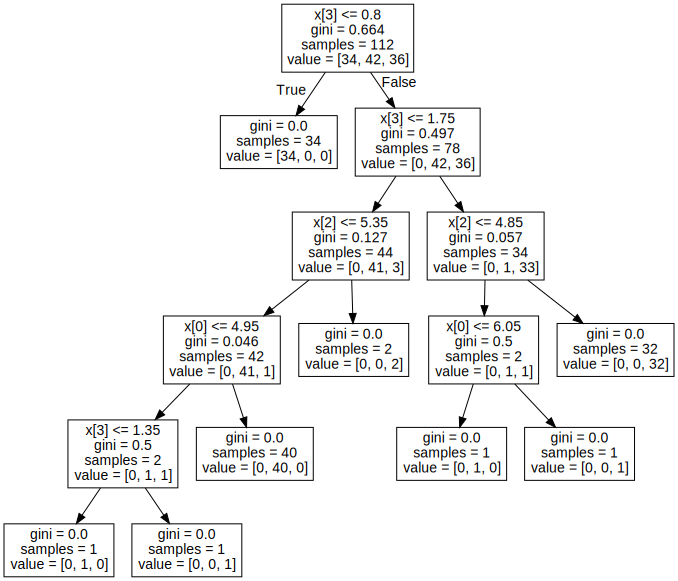

In [ ]:
graph